In [528]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [529]:
url = "https://raw.githubusercontent.com/KirillChizhov33/Machine-Learning/main/heart_disease_uci.csv"
X = pd.read_csv(url)

In [530]:
X.shape

(920, 16)

In [531]:
X.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [532]:
X.columns
X = X.drop(['id'], axis=1)

In [533]:
print(X.shape)
print(X.columns)

(920, 15)
Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [534]:
X.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


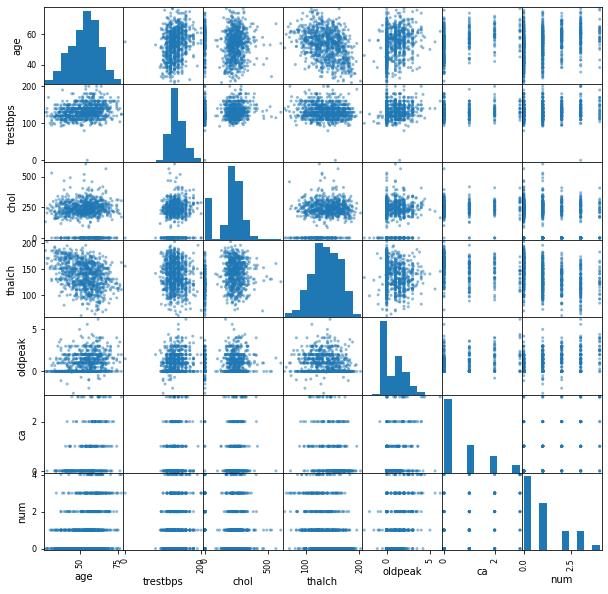

In [535]:
from pandas.plotting import scatter_matrix
scatter_matrix(X, alpha = .5, figsize = (10, 10))
pass

In [536]:
X.corr()

,age,trestbps,chol,thalch,oldpeak,ca,num
age,1.000000,0.244253,-0.086234,-0.365778,0.258243,0.370416,0.339596
trestbps,0.244253,1.000000,0.092853,-0.104899,0.161908,0.093705,0.122291
chol,-0.086234,0.092853,1.000000,0.236121,0.047734,0.051606,-0.231547
thalch,-0.365778,-0.104899,0.236121,1.000000,-0.151174,-0.264094,-0.366265
oldpeak,0.258243,0.161908,0.047734,-0.151174,1.000000,0.281817,0.443084
ca,0.370416,0.093705,0.051606,-0.264094,0.281817,1.000000,0.516216
num,0.339596,0.122291,-0.231547,-0.366265,0.443084,0.516216,1.000000


In [537]:
X['sex'].dtype

dtype('O')

In [538]:
X['sex'] = X['sex'].astype('category')
X['dataset'] = X['dataset'].astype('category')
X['cp'] = X['cp'].astype('category')
X['fbs'] = X['fbs'].astype('category')
X['restecg'] = X['restecg'].astype('category')
X['exang'] = X['exang'].astype('category')
X['slope'] = X['slope'].astype('category')
X['thal'] = X['thal'].astype('category')

In [539]:
X.describe(include=['category'])

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


Всего 16 признаков из которых 8 - категориальные и 8 - количественные

Обработка пропущенных значений

Пропущенные значения в таблице представлены значениями NaN. Посмотрим, сколько пропущенных значений в каждом столбце матрицы

In [540]:
X.isna().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [541]:
X.fillna(X.median(axis = 0), axis=0 , inplace=True) #inplace = True, присвоить значенрие data прямо сейчас

In [542]:
X.isna().sum()

age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64

In [543]:
X['sex'].fillna(X['sex'].mode().iloc[0], inplace=True)
X['dataset'].fillna(X['dataset'].mode().iloc[0], inplace=True)
X['cp'].fillna(X['cp'].mode().iloc[0], inplace=True)
X['fbs'].fillna(X['fbs'].mode().iloc[0], inplace=True)
X['restecg'].fillna(X['restecg'].mode().iloc[0], inplace=True)
X['exang'].fillna(X['exang'].mode().iloc[0], inplace=True)
X['slope'].fillna(X['slope'].mode().iloc[0], inplace=True)
X['thal'].fillna(X['thal'].mode().iloc[0], inplace=True)

In [544]:
X.isna().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Таким образом мы избравились от пропущенных значений

In [545]:
X.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,131.995652,199.908696,137.692391,0.853261,0.227174,0.995652
std,9.424685,18.451300,109.040171,25.145235,1.058049,0.628936,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


Обработка категориальных признаков

In [546]:
X.describe(include=['category'])

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,920,920,920,920,920
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,782,553,583,654,682


In [547]:
X['sex'] = X['sex'].cat.codes
X['fbs'] = X['fbs'].cat.codes
X['exang'] = X['exang'].cat.codes

In [548]:
X.describe(include=['category'])

,dataset,cp,restecg,slope,thal
count,920,920,920,920,920
unique,4,4,3,3,3
top,Cleveland,asymptomatic,normal,flat,normal
freq,304,496,553,654,682


In [549]:
X.describe()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,131.995652,199.908696,0.150000,137.692391,0.366304,0.853261,0.227174,0.995652
std,9.424685,0.408148,18.451300,109.040171,0.357266,25.145235,0.482056,1.058049,0.628936,1.142693
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,177.750000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,140.000000,0.000000,0.500000,0.000000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,0.000000,2.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Можем убедиться что 3 категориальных признака, принимающих 2 значения стали количественными. Например видно, что примерно 79% - мужчины, 21% - женщины

In [550]:
X = X.drop(['dataset'], axis=1)

Избавимся от признака dataset

In [551]:
cp_dummies = pd.get_dummies(X['cp'])
restecg_dummies = pd.get_dummies(X['restecg'])
slope_dummies = pd.get_dummies(X['slope'])
thal_dummies = pd.get_dummies(X['thal'])

In [552]:
X = pd.concat((X, cp_dummies), axis=1)
X = pd.concat((X, pd.get_dummies(X['restecg'])
), axis=1)
X = pd.concat((X, slope_dummies), axis=1)
X = pd.concat((X, thal_dummies), axis=1)

X = X.drop(['cp'], axis=1)
X = X.drop(['restecg'], axis=1)
X = X.drop(['slope'], axis=1)
X = X.drop(['thal'], axis=1)

In [553]:
X.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,typical angina,lv hypertrophy,normal,st-t abnormality,downsloping,flat,upsloping,fixed defect,normal,reversable defect
0,63,1,145.0,233.0,1,150.0,0,2.3,0.0,0,...,1,1,0,0,1,0,0,1,0,0
1,67,1,160.0,286.0,0,108.0,1,1.5,3.0,2,...,0,1,0,0,0,1,0,0,1,0
2,67,1,120.0,229.0,0,129.0,1,2.6,2.0,1,...,0,1,0,0,0,1,0,0,0,1
3,37,1,130.0,250.0,0,187.0,0,3.5,0.0,0,...,0,0,1,0,1,0,0,0,1,0
4,41,0,130.0,204.0,0,172.0,0,1.4,0.0,0,...,0,1,0,0,0,0,1,0,1,0


In [554]:
X.shape

(920, 23)

Нормализация количественных признаков. 

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. 

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [555]:
X_stand = (X - X.mean(axis = 0))/X.std(axis = 0)
X_stand.describe()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,typical angina,lv hypertrophy,normal,st-t abnormality,downsloping,flat,upsloping,fixed defect,normal,reversable defect
count,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,...,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02
mean,1.320200e-16,-8.630777e-16,-1.255035e-17,1.305719e-15,-1.285626e-15,-1.170320e-15,7.508487e-16,-8.169793e-17,3.634170e-15,-1.731881e-15,...,7.958610e-17,-3.590365e-15,-6.289655e-16,-2.331589e-15,5.049101e-16,1.483837e-15,-1.646992e-15,-8.417180e-17,-1.151253e-16,-4.991177e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.706814e+00,-1.933443e+00,-7.153732e+00,-1.833349e+00,-4.198557e-01,-3.089746e+00,-7.598791e-01,-3.263801e+00,-3.612033e-01,-8.713205e-01,...,-2.292910e-01,-5.065091e-01,-1.226855e+00,-4.912259e-01,-2.709840e-01,-1.567155e+00,-5.318048e-01,-2.292910e-01,-1.691872e+00,-5.132734e-01
25%,-6.908315e-01,5.166500e-01,-6.501250e-01,-2.032159e-01,-4.198557e-01,-7.036081e-01,-7.598791e-01,-8.064476e-01,-3.612033e-01,-8.713205e-01,...,-2.292910e-01,-5.065091e-01,-1.226855e+00,-4.912259e-01,-2.709840e-01,-1.567155e+00,-5.318048e-01,-2.292910e-01,-1.691872e+00,-5.132734e-01
50%,5.189886e-02,5.166500e-01,-1.081578e-01,2.117688e-01,-4.198557e-01,9.177121e-02,-7.598791e-01,-3.338796e-01,-3.612033e-01,3.804893e-03,...,-2.292910e-01,-5.065091e-01,8.142060e-01,-4.912259e-01,-2.709840e-01,6.374055e-01,-5.318048e-01,-2.292910e-01,5.904187e-01,-5.132734e-01
75%,6.885249e-01,5.166500e-01,4.338094e-01,6.152898e-01,-4.198557e-01,7.280747e-01,1.314568e+00,6.112565e-01,-3.612033e-01,8.789303e-01,...,-2.292910e-01,-5.065091e-01,8.142060e-01,-4.912259e-01,-2.709840e-01,6.374055e-01,-5.318048e-01,-2.292910e-01,5.904187e-01,-5.132734e-01
max,2.492299e+00,5.166500e-01,3.685613e+00,3.696723e+00,2.379182e+00,2.557447e+00,1.314568e+00,5.053396e+00,4.408754e+00,2.629181e+00,...,4.356529e+00,1.972152e+00,8.142060e-01,2.033511e+00,3.686243e+00,6.374055e-01,1.878345e+00,4.356529e+00,5.904187e-01,1.946162e+00


In [556]:
Z = X_stand.drop(['num'], axis = 1) 
y = X['num']
Z.shape

(920, 22)

In [557]:
print(Z.shape)
print(y.shape)
N, d = Z.shape

(920, 22)
(920,)


In [558]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

644 276


Нейронные сети


In [559]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (30,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          max_iter = 1000,
                          random_state = 42)

In [560]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 233 ms


MLPClassifier(activation='logistic', hidden_layer_sizes=(30,), max_iter=1000,
              random_state=42, solver='lbfgs')

In [561]:
X_train.shape, X_test.shape

((644, 22), (276, 22))

In [562]:
from sklearn.metrics import accuracy_score
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Ошибка на X_train: ", 1-accuracy_score(y_train, y_train_pred))
print("Ошибка на X_test: ", 1-accuracy_score(y_test, y_test_pred))

Ошибка на X_train:  0.0031055900621117516
Ошибка на X_test:  0.5072463768115942


Графики ошибок от альфа

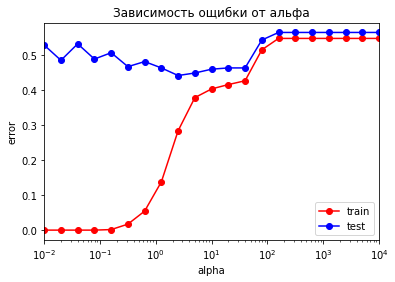

In [563]:
alpha_arr = np.logspace(-2, 4, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for my_alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = my_alpha, hidden_layer_sizes = (30,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Зависимость ощибки от альфа')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [564]:
minimum_train_err = np.min(train_err)
minimum_test_err = np.min(test_err)
print("Минимальная ошибка на X_train: ", minimum_train_err)
print("Максимальная ошибка на X_test: ", minimum_test_err)

Минимальная ошибка на X_train:  0.0
Максимальная ошибка на X_test:  0.4420289855072464


Выберем параметр альфа при котором ошибка на тестовой выборке будет минимальной

Из графика видно, это достигается при альфа ~ 2.4

In [565]:
mlp_model = MLPClassifier(alpha = 2.4, hidden_layer_sizes = (30,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Error on X_train with optimal alpha: ", np.mean(y_train != y_train_pred))
print("Error on X_test with optimal alpha: ", np.mean(y_test != y_test_pred))

Error on X_train with optimal alpha:  0.28726708074534163
Error on X_test with optimal alpha:  0.4384057971014493


Таким образом получили, что ошибка на тестовой выборке примерно 43.8%, на обучающей 28.7%

Теперь попробуем подобрать оптимальное число нейронов

In [569]:
%%time
hidden_layer_arr = np.arange(1, 50)
test_err = []
train_err = []
train_acc = []
test_acc = []

for my_hidden_layer_sizes in hidden_layer_arr:
    mlp_model = MLPClassifier(alpha = 2.4, 
                              hidden_layer_sizes = my_hidden_layer_sizes,
                              solver = 'lbfgs', 
                              max_iter = 1000, 
                              activation = 'logistic',
                              random_state = 42)
    
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Wall time: 30.6 s


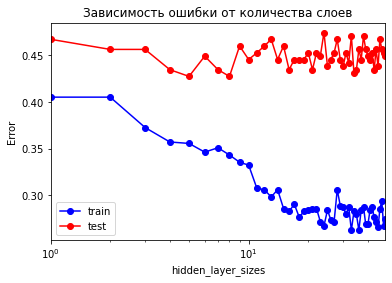

In [570]:
plt.semilogx(hidden_layer_arr, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_arr), np.max(hidden_layer_arr)])
plt.title('Зависимость ошибки от количества слоев')
plt.xlabel('hidden_layer_sizes')
plt.ylabel('Error')
plt.legend()
pass

In [573]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Минимальная ошибка на X_train при альфа = 2.4: ", min_train_err)
print("Минимальная ошибка на X_test при альфа = 2.4: ", min_test_err)

Минимальная ошибка на X_train при альфа = 2.4:  0.26242236024844723
Минимальная ошибка на X_test при альфа = 2.4:  0.427536231884058


Выберем число нейронов при котором ошибка на тестовой выборке будет минимальной, число нейронов = 5

In [582]:
%%time
mlp_model = MLPClassifier(alpha = 2.4, 
                          hidden_layer_sizes = 5,
                          solver = 'lbfgs', 
                          max_iter = 1000, 
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)

Wall time: 98.7 ms


MLPClassifier(activation='logistic', alpha=2.4, hidden_layer_sizes=5,
              max_iter=1000, random_state=42, solver='lbfgs')

In [583]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print("Error on X_train with optimal alpha and hidden_layer_sizes: ", err_train)
print("Error on X_test with optimal alpha and hidden_layer_sizes: ", err_test)

Error on X_train with optimal alpha and hidden_layer_sizes:  0.3555900621118012
Error on X_test with optimal alpha and hidden_layer_sizes:  0.427536231884058


Таким образом получили, что ошибка на тестовой выборке примерно 42.6%, на обучающей 35.6%

То есть ошибка на тестовой выборке стала меньше на 1.1% по сравнению с предыдущим случаем, когда оптимальным был только параметр альфа